<a href="https://colab.research.google.com/github/thisishasan/slda/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
pip install nbconvert

In [158]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [159]:
!wget -nc 'https://raw.githubusercontent.com/thisishasan/slda/refs/heads/main/dataset.csv'

File ‘dataset.csv’ already there; not retrieving.



In [160]:
file_path = os.path.join('dataset.csv')
df = pd.read_csv(file_path)

In [161]:
df.rename(columns = {
    'Battery Electric Vehicles (BEVs)' : "Electric Vehicles",
    'Plug-In Hybrid Electric Vehicles (PHEVs)': 'Hybrid Electric Vehicles',
    'Non-Electric Vehicle Total': 'Non Electric Vehicles'}, inplace=True)
df.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles
0,August 31 2022,Spartanburg,SC,Passenger,0,1,1,36,37,2.70
1,December 31 2019,Adams,WA,Truck,0,0,0,5196,5196,0.00
2,March 31 2020,Chatham,NC,Passenger,1,0,1,6,7,14.29
3,February 28 2023,Howard,MD,Passenger,0,2,2,64,66,3.03
4,August 31 2024,Northampton,PA,Passenger,1,0,1,14,15,6.67


In [162]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.sort_values(by=['Month'], inplace=True)
df.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles,Month,Year
19908,2024-01-31,Kittitas,WA,Passenger,486,121,607,29425,30032,2.02,1,2024
20976,2020-01-31,Fairfax,VA,Passenger,5,1,6,770,776,0.77,1,2020
6071,2024-01-31,Skamania,WA,Passenger,140,54,194,7972,8166,2.38,1,2024
20966,2019-01-31,Grays Harbor,WA,Passenger,67,75,142,47438,47580,0.30,1,2019
6076,2020-01-31,Boone,MO,Passenger,0,1,1,11,12,8.33,1,2020


In [163]:
df_2017 = df[df['Date'].dt.year == 2017]
df_2017.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles,Month,Year
20905,2017-01-31,Clark,WA,Passenger,673,426,1099,297753,298852,0.37,1,2017
5952,2017-01-31,Essex,NJ,Passenger,1,0,1,18,19,5.26,1,2017
5957,2017-01-31,Travis,TX,Passenger,1,1,2,218,220,0.91,1,2017
6027,2017-01-31,Klickitat,WA,Passenger,20,22,42,14795,14837,0.28,1,2017
6049,2017-01-31,Pinal,AZ,Passenger,2,0,2,290,292,0.68,1,2017


In [164]:
df_2018 = df[df['Date'].dt.year == 2018]
df_2018.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles,Month,Year
6096,2018-01-31,Wahkiakum,WA,Passenger,0,2,2,2845,2847,0.07,1,2018
20929,2018-01-31,Okanogan,WA,Truck,0,0,0,16332,16332,0.00,1,2018
21031,2018-01-31,Island,WA,Truck,0,0,0,20770,20770,0.00,1,2018
6517,2018-01-31,Montgomery,TN,Passenger,1,0,1,276,277,0.36,1,2018
6298,2018-01-31,Montgomery,PA,Passenger,1,0,1,33,34,2.94,1,2018


In [165]:
df_2019 = df[df['Date'].dt.year == 2019]
df_2019.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles,Month,Year
20966,2019-01-31,Grays Harbor,WA,Passenger,67,75,142,47438,47580,0.30,1,2019
20956,2019-01-31,Contra Costa,CA,Passenger,1,1,2,393,395,0.51,1,2019
20938,2019-01-31,Anne Arundel,MD,Passenger,0,1,1,446,447,0.22,1,2019
6068,2019-01-31,Douglas,WA,Passenger,51,35,86,28002,28088,0.31,1,2019
21076,2019-01-31,Alexandria,VA,Passenger,1,0,1,158,159,0.63,1,2019


In [166]:
df_2020 = df[df['Date'].dt.year == 2020]
df_2020.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles,Month,Year
20976,2020-01-31,Fairfax,VA,Passenger,5,1,6,770,776,0.77,1,2020
6076,2020-01-31,Boone,MO,Passenger,0,1,1,11,12,8.33,1,2020
6011,2020-01-31,Clark,WA,Truck,0,0,0,81734,81734,0.00,1,2020
5895,2020-01-31,Cowlitz,WA,Truck,0,0,0,29019,29019,0.00,1,2020
6399,2020-01-31,Nueces,TX,Passenger,1,0,1,89,90,1.11,1,2020


In [167]:
df_2021 = df[df['Date'].dt.year == 2021]
df_2021.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles,Month,Year
6147,2021-01-31,Lincoln,WA,Truck,0,0,0,4690,4690,0.00,1,2021
6200,2021-01-31,Clark,NV,Passenger,5,3,8,718,726,1.10,1,2021
5946,2021-01-31,Dakota,MN,Passenger,0,1,1,29,30,3.33,1,2021
6060,2021-01-31,Alexandria,VA,Passenger,3,0,3,130,133,2.26,1,2021
6025,2021-01-31,Kitsap,WA,Passenger,1607,756,2363,179112,181475,1.30,1,2021


In [168]:
df_2022 = df[df['Date'].dt.year == 2022]
df_2022.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles,Month,Year
6179,2022-01-31,Yellowstone,MT,Passenger,0,1,1,35,36,2.78,1,2022
6183,2022-01-31,Fort Bend,TX,Passenger,1,0,1,33,34,2.94,1,2022
6190,2022-01-31,Maricopa,AZ,Passenger,14,5,19,1288,1307,1.45,1,2022
20918,2022-01-31,San Joaquin,CA,Passenger,1,1,2,106,108,1.85,1,2022
21078,2022-01-31,Honolulu,HI,Passenger,4,5,9,423,432,2.08,1,2022


In [169]:
df_2023 = df[df['Date'].dt.year == 2023]
df_2023.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles,Month,Year
6124,2023-01-31,New Haven,CT,Passenger,0,2,2,27,29,6.90,1,2023
20919,2023-01-31,Williamson,TX,Passenger,0,2,2,82,84,2.38,1,2023
6175,2023-01-31,Columbia,WA,Truck,0,0,0,1569,1569,0.00,1,2023
6206,2023-01-31,Larimer,CO,Passenger,1,0,1,42,43,2.33,1,2023
6066,2023-01-31,Lee,AL,Passenger,1,0,1,18,19,5.26,1,2023


In [170]:
df_2024 = df[df['Date'].dt.year == 2024]
df_2024.head()

,Date,County,State,Vehicle Primary Use,Electric Vehicles,Hybrid Electric Vehicles,Electric Vehicle (EV) Total,Non Electric Vehicles,Total Vehicles,Percent Electric Vehicles,Month,Year
19908,2024-01-31,Kittitas,WA,Passenger,486,121,607,29425,30032,2.02,1,2024
6071,2024-01-31,Skamania,WA,Passenger,140,54,194,7972,8166,2.38,1,2024
20960,2024-01-31,Douglas,CO,Passenger,0,2,2,54,56,3.57,1,2024
20951,2024-01-31,Galveston,TX,Passenger,1,1,2,18,20,10.00,1,2024
6158,2024-01-31,Collin,TX,Passenger,4,0,4,48,52,7.69,1,2024


In [171]:
grouped_by_year = df.groupby('Year')[
    ['Electric Vehicles', 'Hybrid Electric Vehicles', 'Non Electric Vehicles']
].sum().reset_index()

grouped_by_year.head()

,Year,Electric Vehicles,Hybrid Electric Vehicles,Non Electric Vehicles
0,2017,200584,103810,71342301
1,2018,270315,145236,72346314
2,2019,391454,185444,73538363
3,2020,506473,208497,73861349
4,2021,664013,250114,74230518


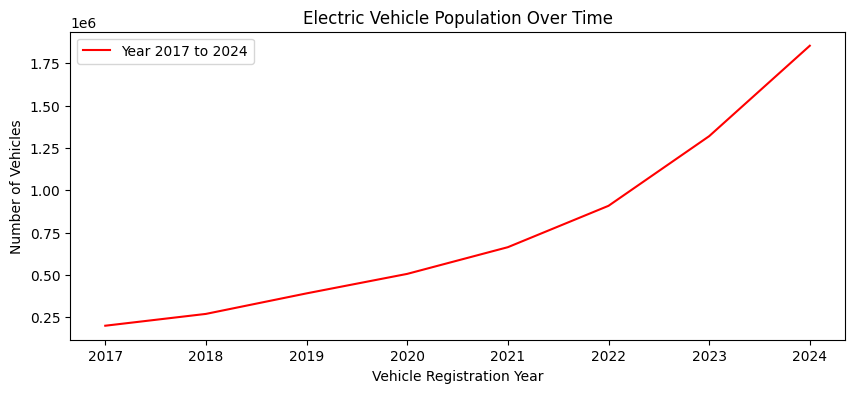

In [172]:
plt.figure(figsize=(10,4), dpi = 100)
plt.plot(grouped_by_year['Year'], grouped_by_year['Electric Vehicles'], '-r', label='Year 2017 to 2024')
plt.xlabel('Vehicle Registration Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.title('Electric Vehicle Population Over Time')
plt.show()

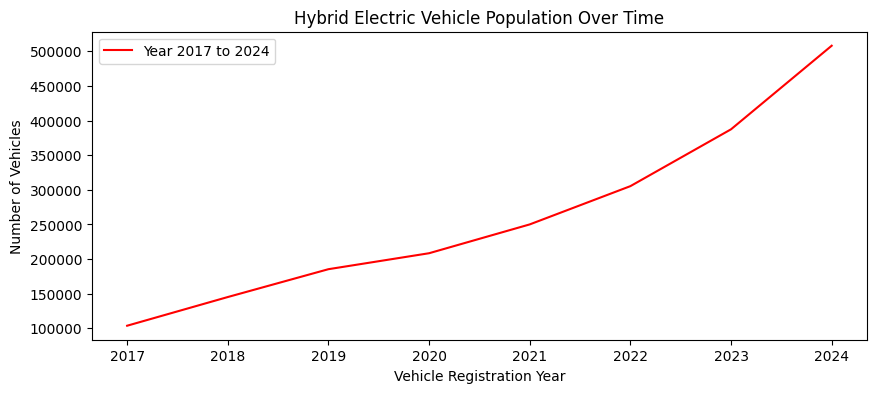

In [173]:
plt.figure(figsize=(10,4), dpi = 100)
plt.plot(grouped_by_year['Year'], grouped_by_year['Hybrid Electric Vehicles'], '-r', label='Year 2017 to 2024')
plt.xlabel('Vehicle Registration Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.title('Hybrid Electric Vehicle Population Over Time')
plt.show()

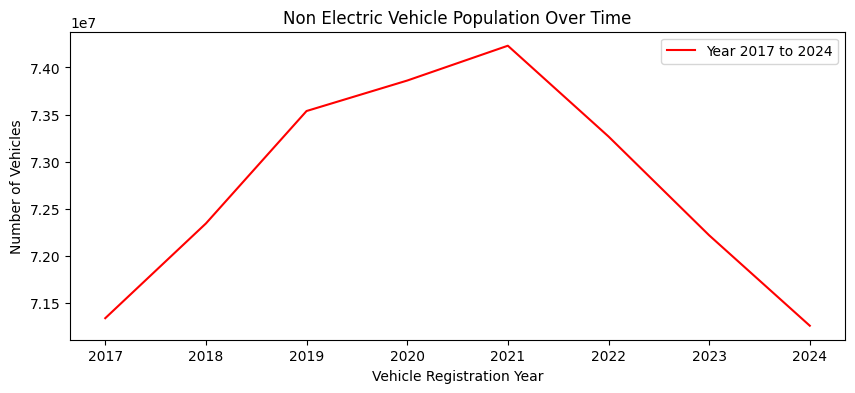

In [174]:
plt.figure(figsize=(10,4), dpi = 100)
plt.plot(grouped_by_year['Year'], grouped_by_year['Non Electric Vehicles'], '-r', label='Year 2017 to 2024')
plt.xlabel('Vehicle Registration Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.title('Non Electric Vehicle Population Over Time')
plt.show()

In [175]:
grouped_by_month_2017 = df_2017.groupby('Month')[
    ['Electric Vehicles', 'Hybrid Electric Vehicles', 'Non Electric Vehicles']
].sum().reset_index()

grouped_by_month_2017.head()

,Month,Electric Vehicles,Hybrid Electric Vehicles,Non Electric Vehicles
0,1,14456,7535,5949422
1,2,14920,7730,5936413
2,3,15311,7929,5934738
3,4,15794,8120,5929675
4,5,16190,8317,5931292


In [176]:
grouped_by_month_2018 = df_2018.groupby('Month')[
    ['Electric Vehicles', 'Hybrid Electric Vehicles', 'Non Electric Vehicles']
].sum().reset_index()

grouped_by_month_2018.head()

,Month,Electric Vehicles,Hybrid Electric Vehicles,Non Electric Vehicles
0,1,19319,10239,5985923
1,2,19565,10531,5980605
2,3,19981,10870,5989473
3,4,20507,11199,5999015
4,5,21265,11616,6011617


In [177]:
grouped_by_month_2019 = df_2019.groupby('Month')[
    ['Electric Vehicles', 'Hybrid Electric Vehicles', 'Non Electric Vehicles']
].sum().reset_index()

grouped_by_month_2019.head()

,Month,Electric Vehicles,Hybrid Electric Vehicles,Non Electric Vehicles
0,1,28585,14322,6089592
1,2,29157,14475,6083022
2,3,29490,14604,6086605
3,4,30468,14849,6100375
4,5,31154,15113,6114950


In [178]:
grouped_by_month_2020 = df_2020.groupby('Month')[
    ['Electric Vehicles', 'Hybrid Electric Vehicles', 'Non Electric Vehicles']
].sum().reset_index()

grouped_by_month_2020.head()

,Month,Electric Vehicles,Hybrid Electric Vehicles,Non Electric Vehicles
0,1,39108,16824,6186638
1,2,39574,16937,6187688
2,3,40287,17071,6178304
3,4,40636,17030,6143932
4,5,40626,17031,6121279


In [179]:
grouped_by_month_2021 = df_2021.groupby('Month')[
    ['Electric Vehicles', 'Hybrid Electric Vehicles', 'Non Electric Vehicles']
].sum().reset_index()

grouped_by_month_2021.head()

,Month,Electric Vehicles,Hybrid Electric Vehicles,Non Electric Vehicles
0,1,48134,18659,6165542
1,2,48997,18945,6162369
2,3,49813,19301,6175465
3,4,51658,19750,6201202
4,5,52897,20151,6200677


In [180]:
grouped_by_month_2022 = df_2022.groupby('Month')[
    ['Electric Vehicles', 'Hybrid Electric Vehicles', 'Non Electric Vehicles']
].sum().reset_index()

grouped_by_month_2022.head()

,Month,Electric Vehicles,Hybrid Electric Vehicles,Non Electric Vehicles
0,1,65165,23315,6158936
1,2,66748,23615,6149825
2,3,68327,24056,6137101
3,4,70712,24408,6127626
4,5,72068,24870,6112998


In [181]:
grouped_by_month_2023 = df_2023.groupby('Month')[
    ['Electric Vehicles', 'Hybrid Electric Vehicles', 'Non Electric Vehicles']
].sum().reset_index()

grouped_by_month_2023.head()

,Month,Electric Vehicles,Hybrid Electric Vehicles,Non Electric Vehicles
0,1,91485,28070,6055641
1,2,93873,28616,6045589
2,3,96367,29284,6027852
3,4,99694,30194,6020663
4,5,103172,31005,6019849


In [182]:
grouped_by_month_2024 = df_2024.groupby('Month')[
    ['Electric Vehicles', 'Hybrid Electric Vehicles', 'Non Electric Vehicles']
].sum().reset_index()

grouped_by_month_2024.head()

,Month,Electric Vehicles,Hybrid Electric Vehicles,Non Electric Vehicles
0,1,135182,37949,5993148
1,2,138736,38787,5981782
2,3,141365,39624,5978526
3,4,145115,40594,5985050
4,5,148577,41314,5980475


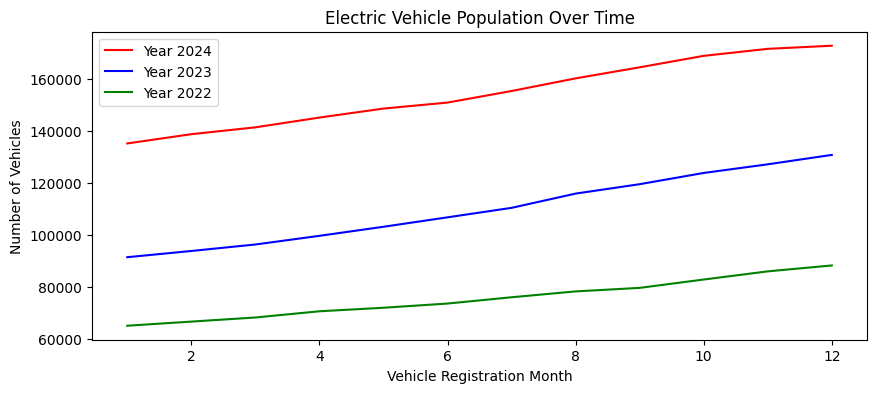

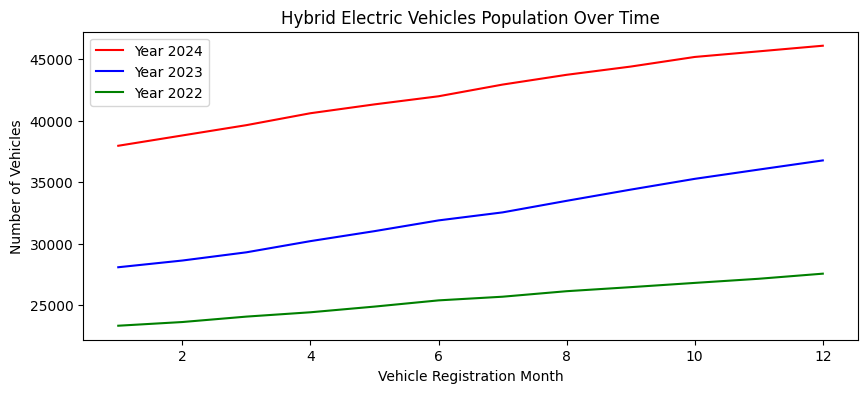

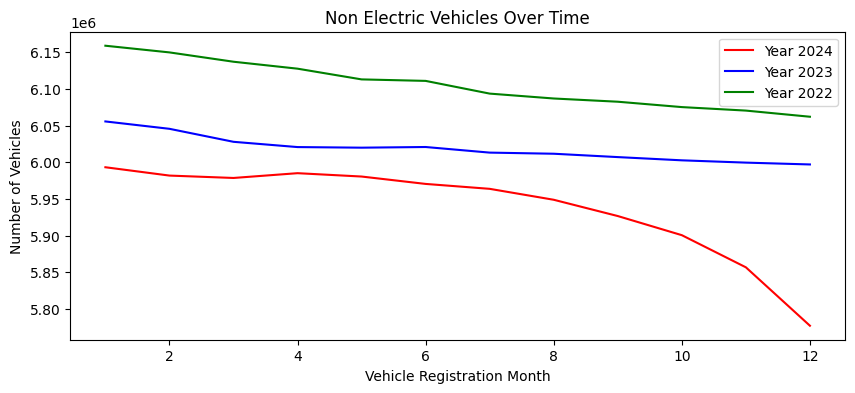

In [183]:
plt.figure(figsize=(10,4), dpi = 100)
plt.plot(grouped_by_month_2024['Month'], grouped_by_month_2024['Electric Vehicles'], '-r', label='Year 2024')
plt.plot(grouped_by_month_2023['Month'], grouped_by_month_2023['Electric Vehicles'], '-b', label='Year 2023')
plt.plot(grouped_by_month_2022['Month'], grouped_by_month_2022['Electric Vehicles'], '-g', label='Year 2022')
plt.xlabel('Vehicle Registration Month')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.title('Electric Vehicle Population Over Time')
plt.show()

plt.figure(figsize=(10,4), dpi = 100)
plt.plot(grouped_by_month_2024['Month'], grouped_by_month_2024['Hybrid Electric Vehicles'], '-r', label='Year 2024')
plt.plot(grouped_by_month_2023['Month'], grouped_by_month_2023['Hybrid Electric Vehicles'], '-b', label='Year 2023')
plt.plot(grouped_by_month_2022['Month'], grouped_by_month_2022['Hybrid Electric Vehicles'], '-g', label='Year 2022')
plt.plot(grouped_by_month_2021['Month'], grouped_by_month_2021['Hybrid Electric Vehicles'], '-g', label='Year 2021')
plt.plot(grouped_by_month_2020['Month'], grouped_by_month_2020['Hybrid Electric Vehicles'], '-g', label='Year 2020')
plt.plot(grouped_by_month_2019['Month'], grouped_by_month_2019['Hybrid Electric Vehicles'], '-g', label='Year 2019')
plt.plot(grouped_by_month_2018['Month'], grouped_by_month_2018['Hybrid Electric Vehicles'], '-g', label='Year 2018')
plt.plot(grouped_by_month_2017['Month'], grouped_by_month_2017['Hybrid Electric Vehicles'], '-g', label='Year 2017')



plt.xlabel('Vehicle Registration Month')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.title('Hybrid Electric Vehicles Population Over Time')
plt.show()

plt.figure(figsize=(10,4), dpi = 100)
plt.plot(grouped_by_month_2024['Month'], grouped_by_month_2024['Non Electric Vehicles'], '-r', label='Year 2024')
plt.plot(grouped_by_month_2023['Month'], grouped_by_month_2023['Non Electric Vehicles'], '-b', label='Year 2023')
plt.plot(grouped_by_month_2022['Month'], grouped_by_month_2022['Non Electric Vehicles'], '-g', label='Year 2022')
plt.xlabel('Vehicle Registration Month')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.title('Non Electric Vehicles Over Time')
plt.show()